In [111]:
print('Aim - Design a machine learning model using Simple Linear Regression')
print('Danish Shaikh  - 221P054 - 35')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Aim - Design a machine learning model using Simple Linear Regression
Danish Shaikh  - 221P054 - 35


In [113]:
df = pd.read_csv('placement.csv')

In [115]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in lpa)')

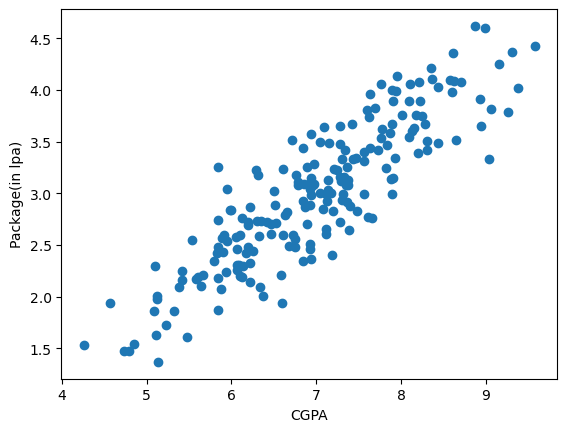

In [117]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [119]:
X = df.iloc[:,0:1] # input Column all rows0-1
y = df.iloc[:,-1] # output Column

In [121]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [123]:
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [125]:
from sklearn.model_selection import train_test_split
# 4 arrays
# random state to reproduce result
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [127]:
from sklearn.linear_model import LinearRegression

In [129]:
lr = LinearRegression()

In [131]:
lr.fit(X_train,y_train) # for training

LinearRegression()

In [133]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [135]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [137]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

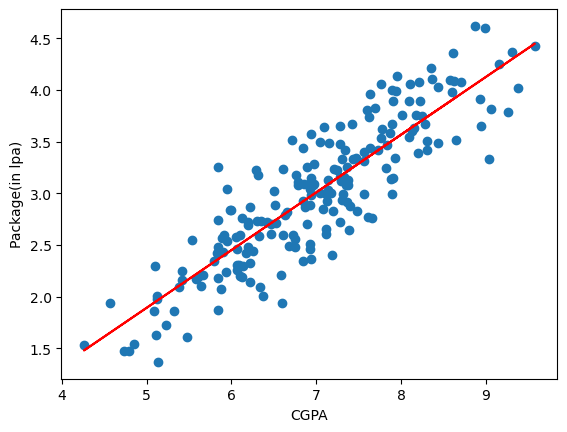

In [139]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red') # LR calculated line
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [141]:
m = lr.coef_ # slope

In [143]:
c = lr.intercept_ # intercept

In [145]:
# y = mx + b
# x cgpa
m * 8.58 + c

array([3.89111601])

In [147]:
m * 9.78 + c

array([4.56065838])

In [149]:
m * 100 + c

array([54.89908542])

In [151]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
def predict_package():
    try:
        cgpa = float(entry_cgpa.get()) # Get CGPA from the input field
        predicted_package = lr.predict(np.array([[cgpa]]))[0] # Predict the p
        label_predicted.config(text=f'Predicted Package: {predicted_package:.2}')
    except ValueError:
        label_predicted.config(text="Invalid input. Please enter a valid CGPA.")

In [153]:
root = tk.Tk()
root.title('Placement Package Predictor')
root.geometry('800x400')

''

Text(0, 0.5, 'Package(in LPA)')

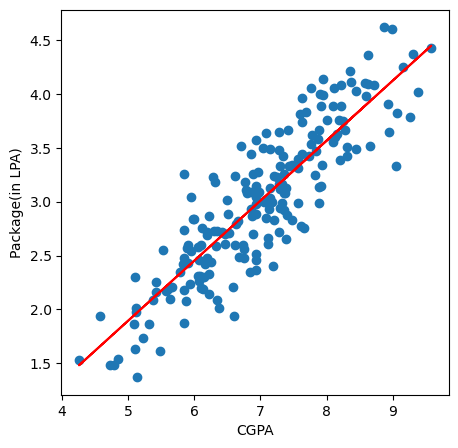

In [155]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [ ]:
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1, padx=10, pady=10)

# Right Frame
frame_right = tk.Frame(root, padx=20, pady=20, bd=2, relief="ridge")
frame_right.pack(side=tk.RIGHT, fill=tk.Y)

# Title
label_title = tk.Label(frame_right, text="Package Predictor", font=("Arial", 14, "bold"))
label_title.grid(row=0, column=0, columnspan=2, pady=10)

# CGPA Input
label_cgpa = tk.Label(frame_right, text="Enter CGPA : ")
label_cgpa.grid(row=1, column=0, sticky="e", padx=5, pady=5)

entry_cgpa = tk.Entry(frame_right, width=15)
entry_cgpa.grid(row=1, column=1, padx=5, pady=5)

# Predict Button
btn_predict = tk.Button(frame_right, text="Predict", command=predict_package)
btn_predict.grid(row=2, column=0, columnspan=2, pady=10)

# Result
label_predicted = tk.Label(frame_right, text="Predicted Package : ", font=("Arial", 12))
label_predicted.grid(row=3, column=0, columnspan=2, pady=10)

root.mainloop()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
